# Assignment 7 (Week 7)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
```

## Name: EBOAGU CHIAMAKA

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [1]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
%load_ext lab_black

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).

### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```



###  Qs 1. Build a machine learning model that predicts the salary.

###  Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

<hr>

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

In [3]:
def data_import(*, filename: str, sep: str = ",") -> pd.DataFrame:
    """This is used to load the data.

    Params;
        filename (str): The filepath.
        sep (str, default=",")

    Returns:
        data (pd.DataFrame): The loaded dataframe.
    """
    df = pd.read_csv(filename, sep=sep)
    print(f"Shape of data:{df.shape}\n")
    return df

In [4]:
df = data_import(
    filename="C:/Users/Todays Soutions/OneDrive/Documents/CHIAMAKA/Data_Science/ASSIGNMENT/salary.csv"
)
df.head()

Shape of data:(32560, 15)



,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Final_weight    32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Country         32560 non-null  object
 14  Salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isna().sum()

Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

In [8]:
print("Age", df.Age.unique())
print("\n")
print("workclass", df.Workclass.unique())
print("\n")

print("Final_weight", df.Final_weight.unique())
print("\n")

print("marital-status", df["Marital_status"].unique())
print("\n")

print("occupation", df.Occupation.unique())
print("\n")

print("relationship", df.Relationship.unique())
print("\n")

print("race", df.Race.unique())
print("\n")

print("Sex", df.Sex.unique())
print("\n")

print("Capital_gain", df.Capital_gain.unique())
print("\n")

print("Capital_loss", df.Capital_loss.unique())
print("\n")

print("Hours_per_week", df.Hours_per_week.unique())

print("\n")

print("Country", df.Country.unique())

Age [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


workclass [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Final_weight [ 83311 215646 234721 ...  34066  84661 257302]


marital-status [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']


occupation [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']


relationship [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian

In [9]:
df.isnull().values.any()

False

In [10]:
df["Final_weight"].unique()

array([ 83311, 215646, 234721, ...,  34066,  84661, 257302], dtype=int64)

In [11]:
df["Final_weight"] = df["Final_weight"].astype(str)
df_filtered = df.loc[df["Final_weight"].str.contains(r"\.\.\.")]
print(df_filtered["Final_weight"])

Series([], Name: Final_weight, dtype: object)


In [12]:
df["Final_weight"] = df["Final_weight"].astype(int)

In [13]:
df["Capital_gain"].unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

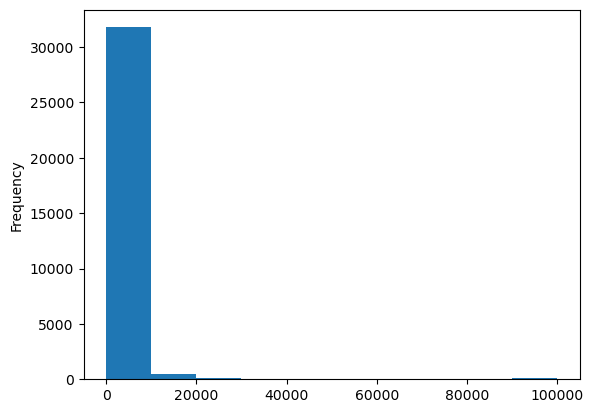

In [14]:
ax = df["Capital_gain"].plot(kind="hist", bins=10)

In [15]:
df.loc[df.duplicated(subset=["Capital_loss"])]

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


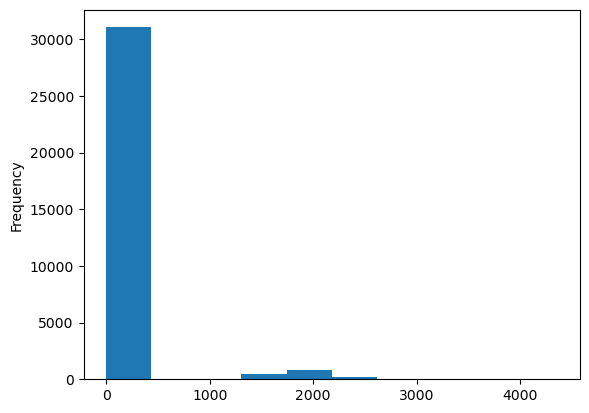

In [16]:
ax = df["Capital_loss"].plot(kind="hist")

In [17]:
num_data = df.select_dtypes(exclude=["O"])
cat_data = df.select_dtypes(include=["O"])
num_data.shape, cat_data.shape

((32560, 6), (32560, 9))

In [18]:
# numeric variable
num_data.head()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


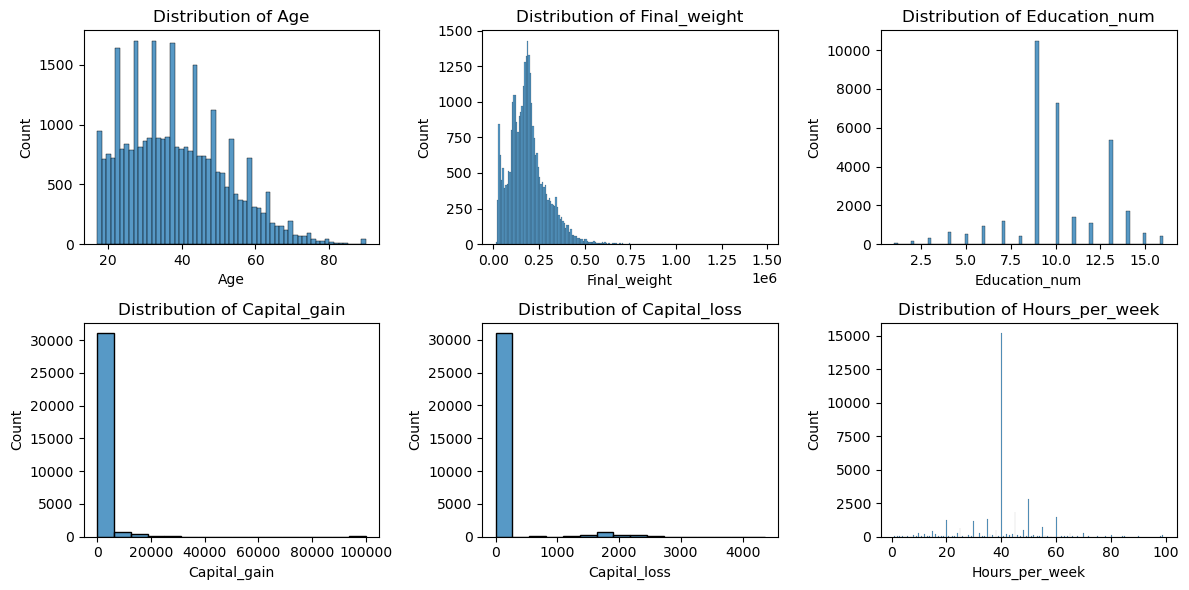

In [19]:
# VISUALIZING THE NUMERIC DATA

n_rows, n_cols = 2, 3
THRESH = 10

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 6))

for idex, feat in enumerate(num_data.columns):
    if n_rows > 1:
        ax = axs[(idex // n_cols), (idex % n_cols)]
    else:
        ax = axs[idex]

    if len(df[feat].unique()) > THRESH:
        sns.histplot(data=df, x=feat, ax=ax)
    else:
        sns.countplot(data=df, x=feat, ax=ax)
    ax.set_title(f"Distribution of {feat}")

fig.tight_layout()
plt.show()

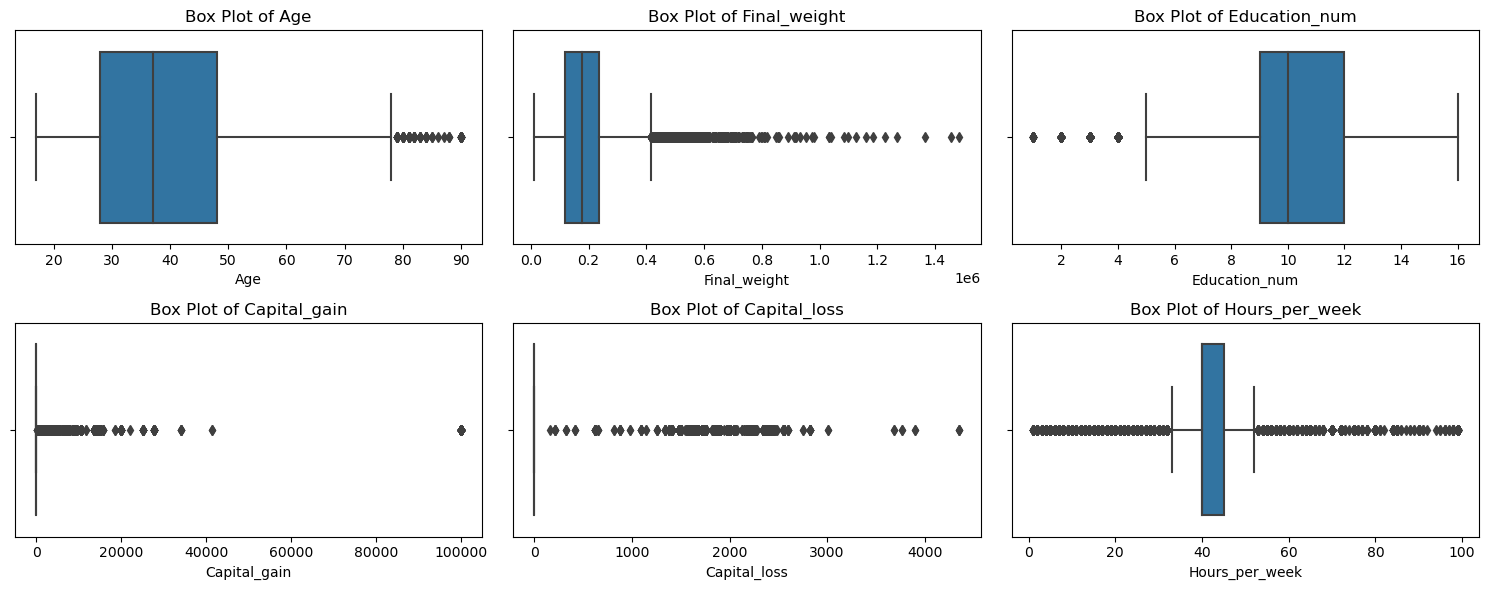

In [20]:
n_rows, n_cols = 2, 3
THRESH = 10

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 6))

for idex, feat in enumerate(num_data.columns):
    if n_rows > 1:
        ax = axs[(idex // n_cols), (idex % n_cols)]
    else:
        ax = axs[idex]

    sns.boxplot(data=df, x=feat, ax=ax)
    ax.set_title(f"Box Plot of {feat}")

fig.tight_layout()
plt.show()

There are too many outliers values in -
* Capital_gain
* Capital_loss

In [21]:
# Categorical Data
cat_data.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Country,Salary
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [22]:
# Visualizing the categorical variable
def plot_count(
    data: pd.DataFrame,
    features: list[str],
    n_row: int,
    n_cols: int,
    figsize: tuple = (15, 8),
) -> "Plot":
    """This returns a count plot of all the specified features"""
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idex, feat in enumerate(df.columns):
        if n_row > 1:
            ax = axs[(idex // n_cols), (idex % n_cols)]
        else:
            ax = axs[idex]

        sns.countplot(data=df, x=feat, ax=ax)
        ax.set_title(f"Count Plot of {feat!r}")

        labels = sorted(df[feat].value_counts().index)
        ax.tick_params(axis="x", rotation=80)

    fig.tight_layout()
    plt.show()

In [23]:
def plot_count(
    data: pd.DataFrame,
    features: list[str],
    n_row: int,
    n_cols: int,
    figsize: tuple = (15, 8),
) -> "Plot":
    """This returns a count plot of all the specified features"""
    fig, axs = plt.subplots(n_row, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_row > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]

        sns.countplot(data=data, x=feat, ax=ax)
        ax.set_title(f"Count Plot of {feat!r}")

        labels = sorted(data[feat].value_counts().index)
        ax.tick_params(axis="x", rotation=80)

    fig.tight_layout()
    plt.show()

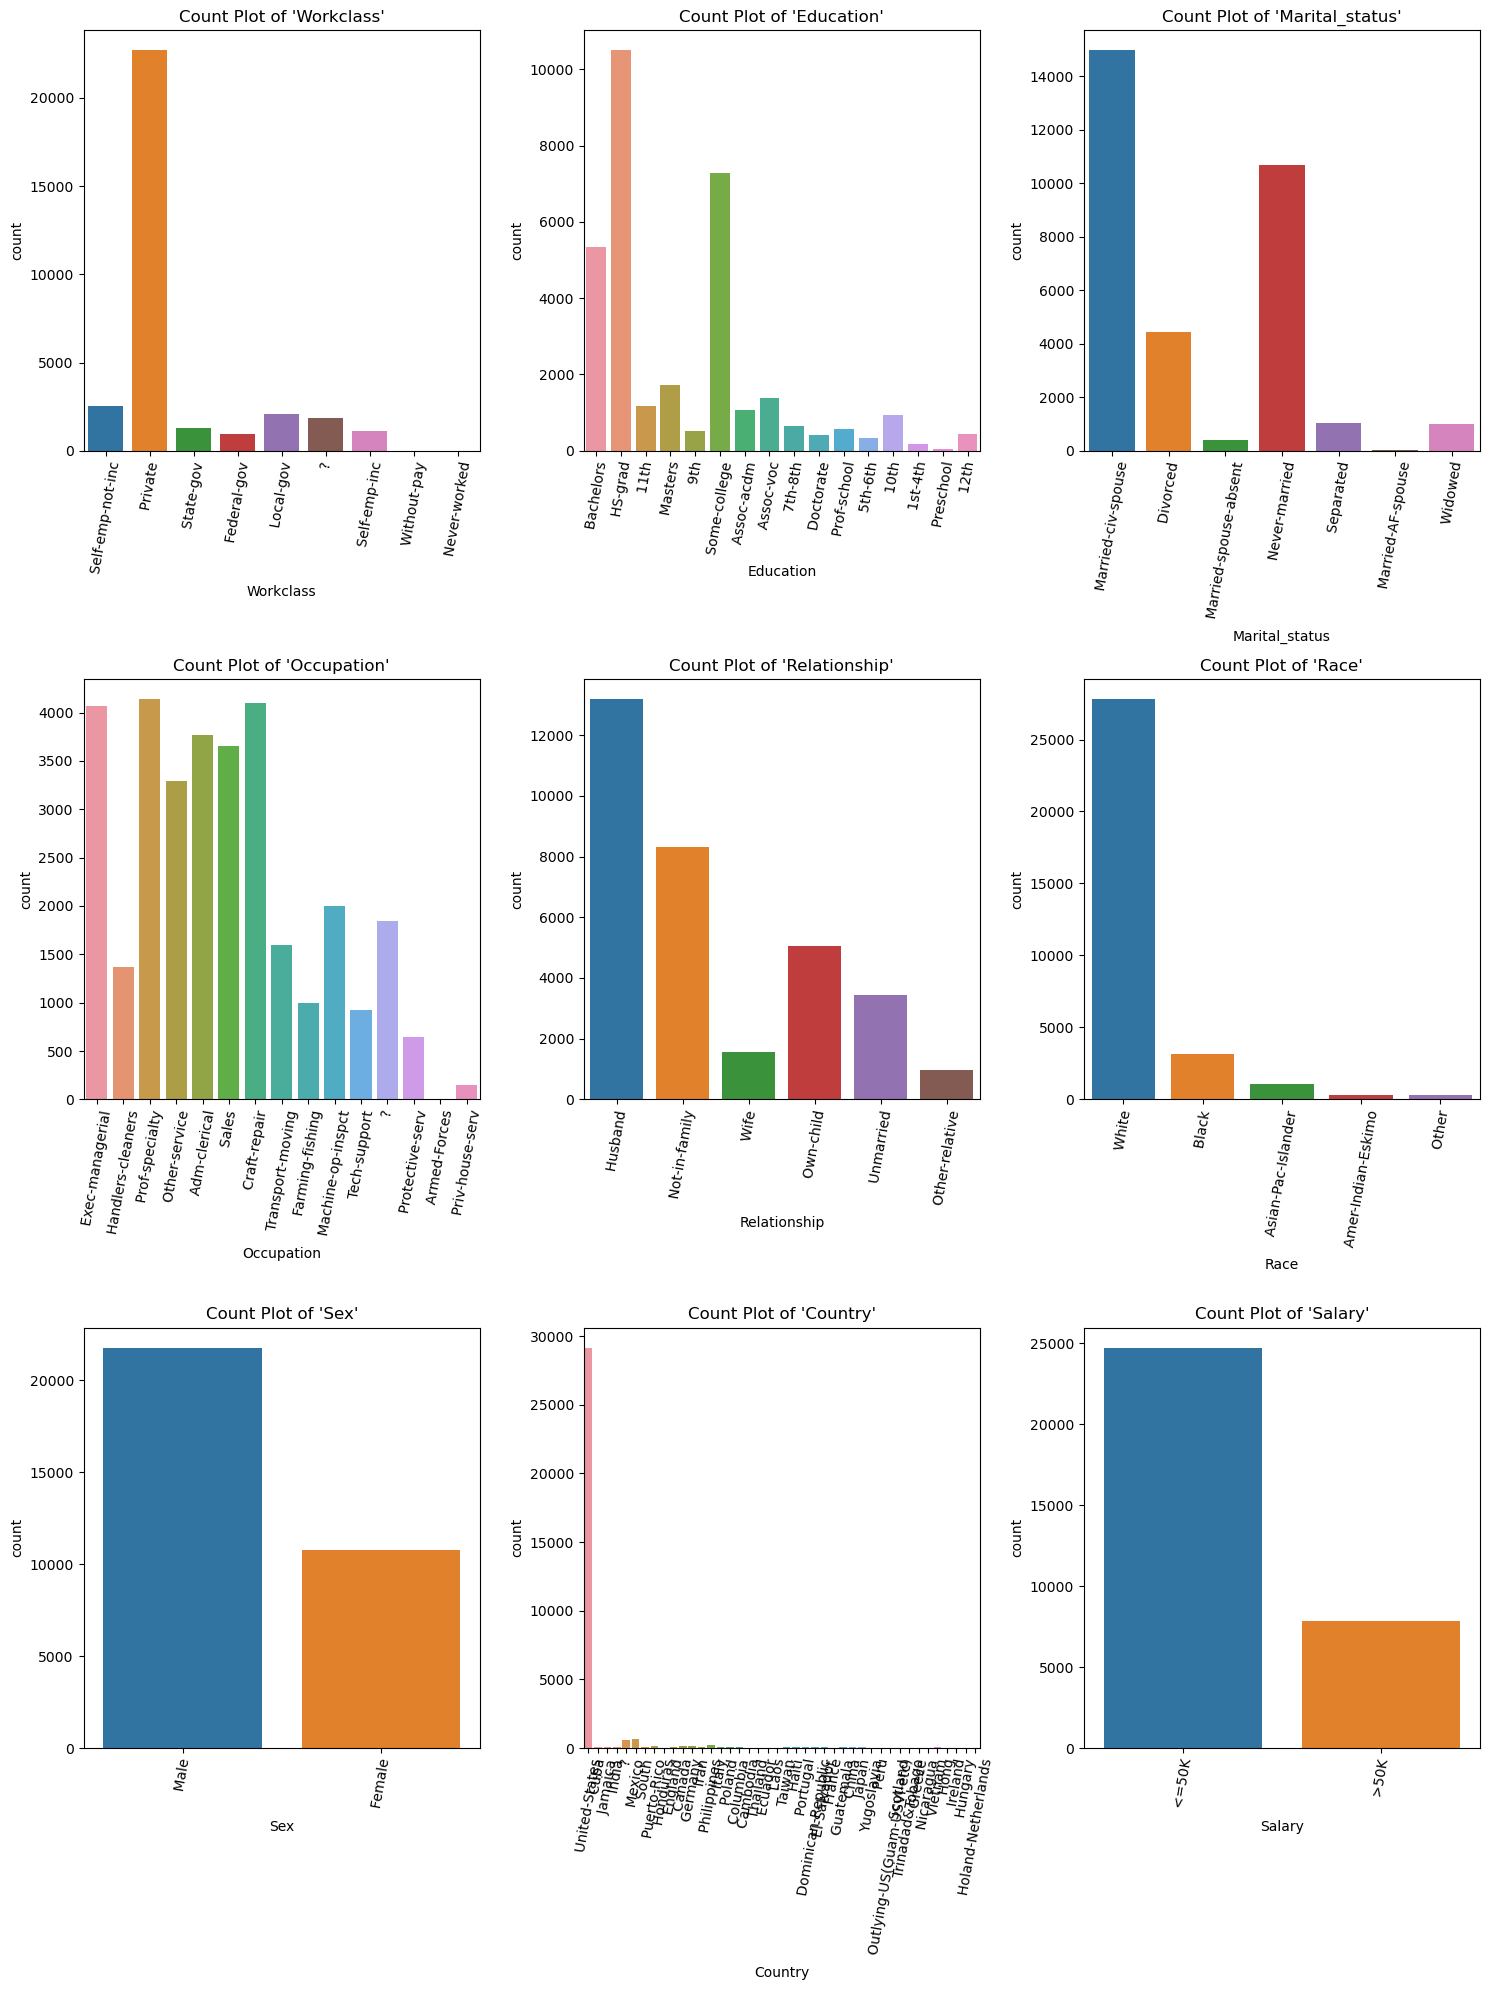

In [24]:
plot_count(
    data=cat_data, features=cat_data.columns, n_row=3, n_cols=3, figsize=(15, 20)
)

In [25]:
df["Workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [26]:
df["Occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [27]:
df[df["Workclass"].str.contains("\?")]

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [28]:
# Replace the ? in Workclass and Occupation column with the most common value

wrk_most_freq = df["Workclass"].mode().values[0]
occ_most_freq = df["Occupation"].mode().values[0]


# ===== Workclass =====
df["Workclass"].replace(" ?", wrk_most_freq, inplace=True)


# ===== Occupation =====
df["Occupation"].replace(" ?", occ_most_freq, inplace=True)

In [29]:
df["Occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

#### Feature selection

In [30]:
# Check for the number of unique values
TARGET = "Salary"
result_dict = {}

for feat in df.columns:
    if feat != TARGET:
        num_uniq = df[feat].nunique()
        result_dict[feat] = num_uniq

result_dict

{'Age': 73,
 'Workclass': 8,
 'Final_weight': 21647,
 'Education': 16,
 'Education_num': 16,
 'Marital_status': 7,
 'Occupation': 14,
 'Relationship': 6,
 'Race': 5,
 'Sex': 2,
 'Capital_gain': 119,
 'Capital_loss': 92,
 'Hours_per_week': 94,
 'Country': 42}

C:\Users\Todays Soutions\AppData\Local\Temp\ipykernel_10448\3097577080.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.drop(columns=[TARGET]).corr().abs()


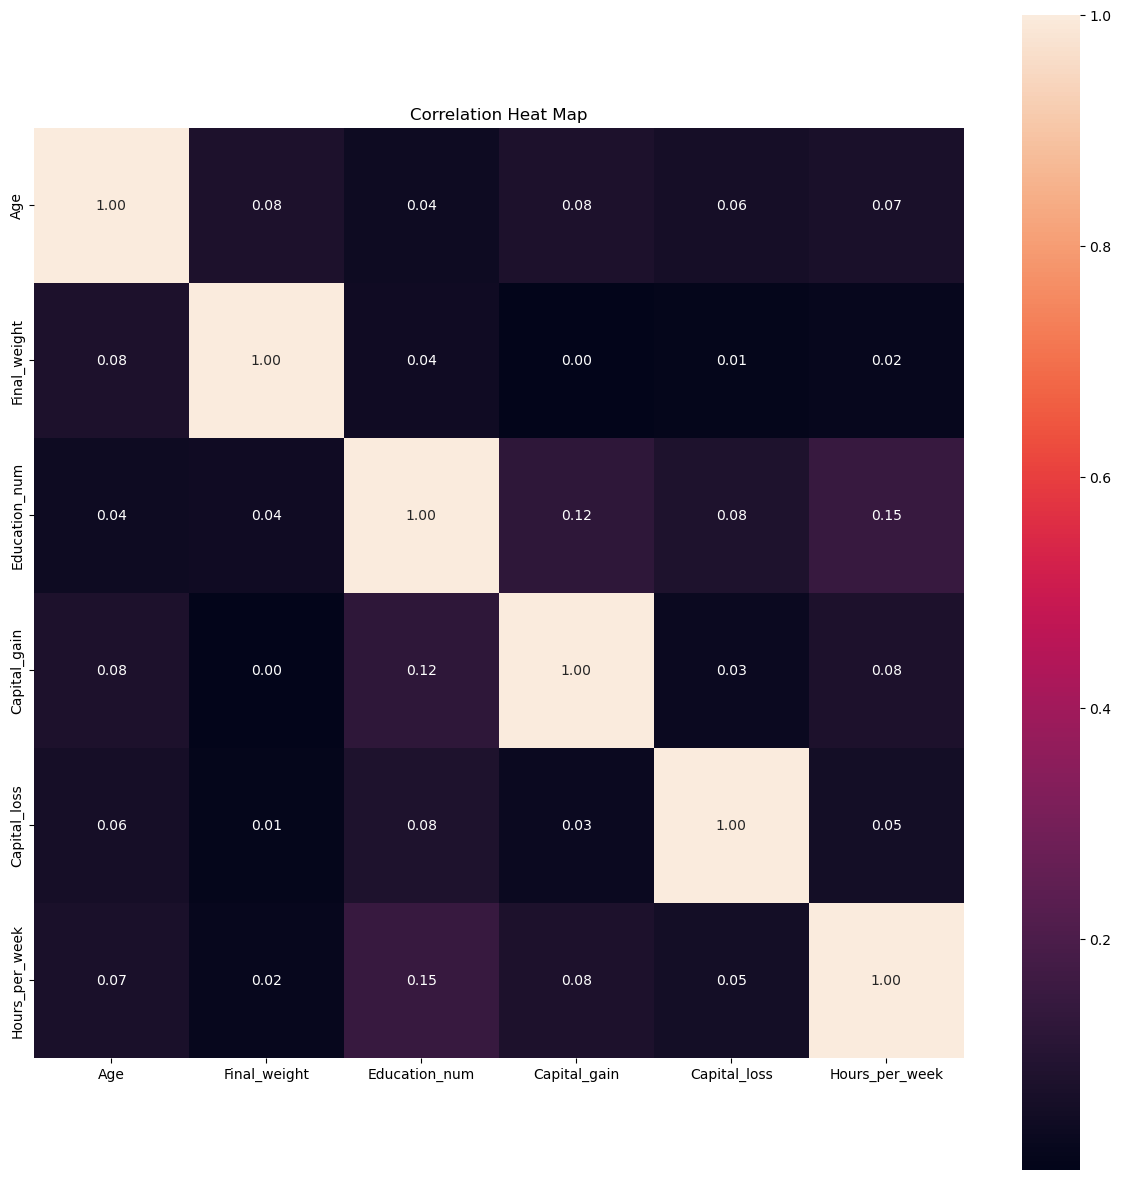

In [31]:
# Check for correlation
corr_matrix = df.drop(columns=[TARGET]).corr().abs()

plt.figure(figsize=(15, 15))
sns.heatmap(data=corr_matrix, annot=True, square=True, fmt=".2f")
plt.title("Correlation Heat Map")
plt.show()

In [32]:
df["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
1485       51
2415       49
1602       47
1740       42
1590       40
1876       39
1672       34
1564       25
2258       25
2001       24
1669       24
1741       24
1980       23
1719       22
2051       21
2002       21
1408       21
1579       20
2377       20
1504       18
1721       18
1974       18
2339       17
2179       15
1628       15
1762       14
2559       12
625        12
2444       12
2824       10
1617        9
2042        9
2205        9
2392        9
1651        9
1594        8
2174        7
1380        7
1340        7
1092        7
2206        6
2057        6
880         6
1573        6
2246        6
2603        5
213         4
1825        4
1668        4
1258        4
2547        4
1726        4
2129        3
419         3
2231        3
2267        3
2457        3
323         3
653         3
4356        3
3770        2
1755        2
3683        2
1648        2
2754        2
3900        2
1138  

In [33]:
df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
3325        53
2174        47
10520       43
4064        42
14084       41
4650        41
3137        37
20051       37
27828       34
594         34
3908        32
2829        31
13550       27
6849        27
14344       26
1055        25
2885        24
3411        24
2176        23
4787        23
3464        23
9386        22
2597        20
4101        20
2407        19
4865        17
2202        16
1506        15
3942        14
3674        14
4416        12
2580        12
4508        12
3781        12
10605       12
2463        11
2907        11
5455        11
2354        11
2635        11
25236       11
6497        11
7430         9
2105         9
6418         9
2964         9
2977         8
1151         8
2414         8
3471         8
914          8
4934         7
1831         7
1409         7
1471         7
3818         7
1797      

In [34]:
# Drop Capital_gain and Capital_loss column
df = df.drop(columns=["Capital_gain", "Capital_loss"])

In [35]:
df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [36]:
df["Marital_status"].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

#### Combine data in Marital_status

In [37]:
df["Marital_status"].replace(" Divorced", "No Spouse", inplace=True)
df["Marital_status"].replace(" Married-spouse-absent", "No Spouse", inplace=True)
df["Marital_status"].replace(" Separated", "No Spouse", inplace=True)
df["Marital_status"].replace(" Widowed", "No Spouse", inplace=True)
df["Marital_status"].replace(" Married-AF-Spouse", "No Spouse", inplace=True)
df["Marital_status"].replace(" Divorced", "No Spouse", inplace=True)


# Verify
df["Marital_status"].value_counts()

 Married-civ-spouse    14976
 Never-married         10682
No Spouse               6879
 Married-AF-spouse        23
Name: Marital_status, dtype: int64

#### Combine data in Education

In [38]:
df["Education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [39]:
df["Education"].replace(" HS-grad", "College", inplace=True)
df["Education"].replace(" Some-college", "College", inplace=True)
df["Education"].replace(" Prof-school", "Doctorate", inplace=True)
df["Education"].replace(" 11th", "High_School", inplace=True)
df["Education"].replace(" 9th", "High_School", inplace=True)
df["Education"].replace(" 12th", "High_School", inplace=True)
df["Education"].replace(" 10th", "High_School", inplace=True)
df["Education"].replace(" 7th-8th", "High_School", inplace=True)


df["Education"].value_counts()

College        17792
 Bachelors      5354
High_School     3701
 Masters        1723
 Assoc-voc      1382
 Assoc-acdm     1067
Doctorate        576
 Doctorate       413
 5th-6th         333
 1st-4th         168
 Preschool        51
Name: Education, dtype: int64

#### Combine data in Education

In [40]:
df["Race"].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [41]:
df["Race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [42]:
df["Race"].replace(" Amer-Indian-Eskimo", " Other", inplace=True)
df["Race"].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Other                   582
Name: Race, dtype: int64

### FEATURE ENCODING

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
cat_data.columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Country', 'Salary'],
      dtype='object')

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [47]:
cat_cols = [col for col in X.columns if X[col].dtype == "object"]
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")
X_ohe = ohe.fit_transform(X[cat_cols])

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [48]:
X_ohe_df = pd.DataFrame(X_ohe, columns=ohe.get_feature_names_out(cat_cols))
X_ohe_df

,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 1st-4th,Education_ 5th-6th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ Masters,Education_ Preschool,Education_College,Education_Doctorate,Education_High_School,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Never-married,Marital_status_No Spouse,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Country_ ?,Country_ Cambodia,Country_ Canada,Country_ China,Country_ Columbia,Country_ Cuba,Country_ Dominican-Republic,Country_ Ecuador,Country_ El-Salvador,Country_ England,Country_ France,Country_ Germany,Country_ Greece,Country_ Guatemala,Country_ Haiti,Country_ Holand-Netherlands,Country_ Honduras,Country_ Hong,Country_ Hungary,Country_ India,Country_ Iran,Country_ Ireland,Country_ Italy,Country_ Jamaica,Country_ Japan,Country_ Laos,Country_ Mexico,Country_ Nicaragua,Country_ Outlying-US(Guam-USVI-etc),Country_ Peru,Country_ Philippines,Country_ Poland,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [49]:
ohe.get_feature_names_out()

array(['Workclass_ Federal-gov', 'Workclass_ Local-gov',
       'Workclass_ Never-worked', 'Workclass_ Private',
       'Workclass_ Self-emp-inc', 'Workclass_ Self-emp-not-inc',
       'Workclass_ State-gov', 'Workclass_ Without-pay',
       'Education_ 1st-4th', 'Education_ 5th-6th',
       'Education_ Assoc-acdm', 'Education_ Assoc-voc',
       'Education_ Bachelors', 'Education_ Doctorate',
       'Education_ Masters', 'Education_ Preschool', 'Education_College',
       'Education_Doctorate', 'Education_High_School',
       'Marital_status_ Married-AF-spouse',
       'Marital_status_ Married-civ-spouse',
       'Marital_status_ Never-married', 'Marital_status_No Spouse',
       'Occupation_ Adm-clerical', 'Occupation_ Armed-Forces',
       'Occupation_ Craft-repair', 'Occupation_ Exec-managerial',
       'Occupation_ Farming-fishing', 'Occupation_ Handlers-cleaners',
       'Occupation_ Machine-op-inspct', 'Occupation_ Other-service',
       'Occupation_ Priv-house-serv', 'Occupatio

In [50]:
X_combined = pd.concat([X.drop(cat_cols, axis=1), X_ohe_df], axis=1)
X_combined

,Age,Final_weight,Education_num,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 1st-4th,Education_ 5th-6th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ Masters,Education_ Preschool,Education_College,Education_Doctorate,Education_High_School,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Never-married,Marital_status_No Spouse,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Country_ ?,Country_ Cambodia,Country_ Canada,Country_ China,Country_ Columbia,Country_ Cuba,Country_ Dominican-Republic,Country_ Ecuador,Country_ El-Salvador,Country_ England,Country_ France,Country_ Germany,Country_ Greece,Country_ Guatemala,Country_ Haiti,Country_ Holand-Netherlands,Country_ Honduras,Country_ Hong,Country_ Hungary,Country_ India,Country_ Iran,Country_ Ireland,Country_ Italy,Country_ Jamaica,Country_ Japan,Country_ Laos,Country_ Mexico,Country_ Nicaragua,Country_ Outlying-US(Guam-USVI-etc),Country_ Peru,Country_ Philippines,Country_ Poland,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,50,83311,13,13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,215646,9,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,53,234721,7,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28,338409,13,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37,284582,14,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [51]:
# Apply Label Encoding to the dependent variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

### Splitting Data

In [53]:
from sklearn.model_selection import train_test_split

RANDOM_STATE, TEST_SIZE = 42, 0.2
X = X_combined
y = y_encoded

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)
X_train.shape, X_test.shape

((26048, 95), (6512, 95))

### FEATURE SELECTION

In [54]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [55]:
univariate = f_classif(X_train, y_train)

univariate

(array([1.49315663e+03, 2.03565810e+00, 3.25914184e+03, 1.52526795e+03,
        9.06764498e+01, 2.40883880e+01, 1.89097141e+00, 3.81987762e+02,
        4.84610163e+02, 1.93202278e+01, 6.66613190e+00, 3.15225580e+00,
        3.02837322e+01, 5.59256679e+01, 8.54581129e-02, 3.70328702e+00,
        8.91201915e+02, 4.63029551e+02, 8.23938491e+02, 1.26281597e+01,
        8.32823003e+02, 6.15237021e+02, 5.96641218e+02, 8.68667797e-01,
        6.49884725e+03, 2.97140723e+03, 8.49899838e+02, 1.98750311e+02,
        2.52154990e+00, 2.71406894e+00, 1.25839258e+03, 7.24024025e+01,
        2.02507779e+02, 1.28357156e+02, 6.55685890e+02, 3.41617214e+01,
        3.35540647e+02, 1.61277873e+01, 1.31787015e+01, 1.17163605e+01,
        9.23134306e+00, 5.12394627e+03, 9.80422807e+02, 1.96619047e+02,
        1.42675461e+03, 5.41189614e+02, 3.83132302e+02, 2.06534756e+00,
        2.20461302e+02, 5.85867559e+01, 2.12072596e+02, 1.32933496e+03,
        1.32933496e+03, 1.93202882e-02, 1.73197530e+00, 5.410127

In [56]:
len(univariate)

2

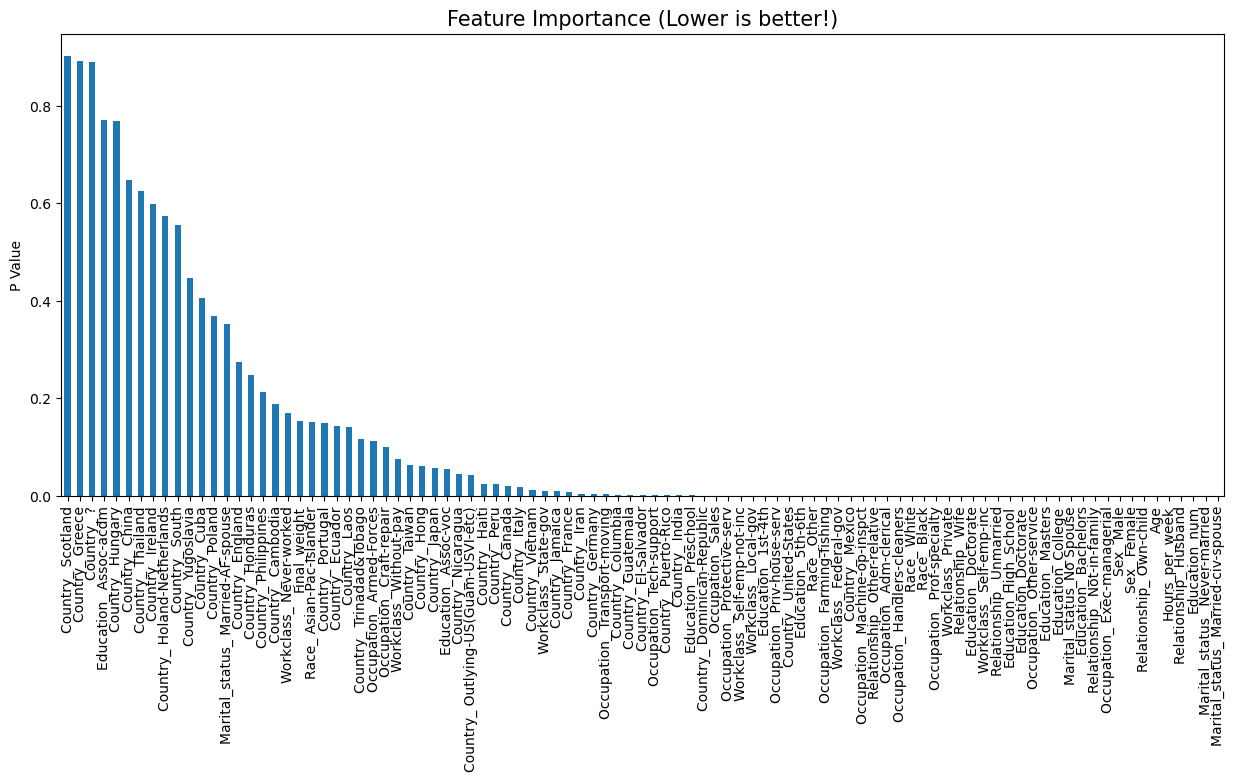

In [57]:
feat_importance = pd.Series(univariate[1])
feat_importance.index = X_train.columns
feat_importance.sort_values(ascending=False).plot(
    kind="bar",
    ylabel="P Value",
    figsize=(15, 6),
)
plt.title("Feature Importance (Lower is better!)", size=15)
plt.show()

In [58]:
num = 45
selector = SelectKBest(f_classif, k=num)
X_train_selected = selector.fit_transform(X_train, y_train)
# The selected features
X_train.columns[selector.get_support()]

Index(['Age', 'Education_num', 'Hours_per_week', 'Workclass_ Federal-gov',
       'Workclass_ Local-gov', 'Workclass_ Private', 'Workclass_ Self-emp-inc',
       'Workclass_ Self-emp-not-inc', 'Education_ 1st-4th',
       'Education_ 5th-6th', 'Education_ Bachelors', 'Education_ Doctorate',
       'Education_ Masters', 'Education_ Preschool', 'Education_College',
       'Education_Doctorate', 'Education_High_School',
       'Marital_status_ Married-civ-spouse', 'Marital_status_ Never-married',
       'Marital_status_No Spouse', 'Occupation_ Adm-clerical',
       'Occupation_ Exec-managerial', 'Occupation_ Farming-fishing',
       'Occupation_ Handlers-cleaners', 'Occupation_ Machine-op-inspct',
       'Occupation_ Other-service', 'Occupation_ Priv-house-serv',
       'Occupation_ Prof-specialty', 'Occupation_ Protective-serv',
       'Occupation_ Sales', 'Relationship_ Husband',
       'Relationship_ Not-in-family', 'Relationship_ Other-relative',
       'Relationship_ Own-child', 'Rel

In [59]:
# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = X_train.columns[selected_feature_indices]


# Create a new DataFrame with the selected features
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names)

In [60]:
# remove the constant features:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold object with the default threshold
selector = VarianceThreshold()

# Fit the selector on the training data
selector.fit(X_train)

# Get the indices of the constant features
constant_features_idx = selector.get_support(indices=True)

# Remove the constant features from the training and test data
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

# Print the indices of the constant features
print("The indices of the constant features are: ", constant_features_idx)

The indices of the constant features are:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]


In [61]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the scaler
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

## Model Building

#### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Create a logistic regression model
lr = LogisticRegression()

# Fit the model on the selected training data
lr.fit(X_train_scaled, y_train)

# Transform the test data to select the same 'num' features
X_test_selected = selector.transform(X_test_scaled)

# Make predictions on the transformed test data
y_pred = lr.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

# Obtain the predicted probabilities for each class for each instance in the test set

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but VarianceThreshold was fitted with feature names
  warnings.warn(


0.8323095823095823

### Make predictions after Logistic Regression

In [63]:
def create_result(*, y_true: np.ndarray, y_pred: np.ndarray):
    """This returns a DataFrame containing the true,
    predicted and error values."""
    # Convert predictions to a dataframe
    result = pd.DataFrame()

    result["Actual_score"] = y_true
    result["Predicted_score"] = y_pred
    result["Error_in_predictions"] = result["Actual_score"] - result["Predicted_score"]

    return result

In [64]:
result = create_result(y_true=y_test, y_pred=y_pred)
result.sample(n=10, random_state=RANDOM_STATE)

,Actual_score,Predicted_score,Error_in_predictions
1263,1,0,1
3951,1,1,0
6200,0,0,0
6081,0,0,0
96,0,0,0
1477,0,0,0
3159,1,1,0
1400,0,0,0
3767,0,0,0
3017,1,1,0


#### Decision Tree Classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_scaled, y_train)
y_pred_tr = tree_clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_tr)
print("Accuracy score on the test set:", accuracy)

Accuracy score on the test set: 0.7681203931203932


### Make predictions Using DecisionTreeClassifier

In [66]:
def create_result(*, y_true: np.ndarray, y_pred: np.ndarray):
    """This returns a DataFrame containing the true,
    predicted and error values."""
    # Convert predictions to a dataframe
    result = pd.DataFrame()

    result["Actual_score"] = y_true
    result["Predicted_score"] = y_pred_tr
    result["Error_in_predictions"] = result["Actual_score"] - result["Predicted_score"]

    return result

In [67]:
result = create_result(y_true=y_test, y_pred=y_pred_tr)
result.sample(n=10, random_state=RANDOM_STATE)

,Actual_score,Predicted_score,Error_in_predictions
1263,1,0,1
3951,1,1,0
6200,0,0,0
6081,0,0,0
96,0,0,0
1477,0,0,0
3159,1,0,1
1400,0,0,0
3767,0,0,0
3017,1,0,1


### RandomForestClassifier

In [68]:
from sklearn.ensemble import RandomForestClassifier  # Random Forest

# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train_scaled, y_train)
y_pred_rf = randomforest.predict(X_test_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_rf)
print("The accuracy of the Random Forest Model is:", accuracy)

The accuracy of the Random Forest Model is: 0.824017199017199


### Make predictions Using Random Forest Classifier

In [69]:
def create_result(*, y_true: np.ndarray, y_pred: np.ndarray):
    """This returns a DataFrame containing the true,
    predicted and error values."""
    # Convert predictions to a dataframe
    result = pd.DataFrame()

    result["Actual_score"] = y_true
    result["Predicted_score"] = y_pred_rf
    result["Error_in_predictions"] = result["Actual_score"] - result["Predicted_score"]

    return result

In [70]:
result = create_result(y_true=y_test, y_pred=y_pred_rf)
result.sample(n=10, random_state=RANDOM_STATE)

,Actual_score,Predicted_score,Error_in_predictions
1263,1,0,1
3951,1,1,0
6200,0,0,0
6081,0,0,0
96,0,0,0
1477,0,0,0
3159,1,1,0
1400,0,0,0
3767,0,0,0
3017,1,0,1


#### EVALUATE MODEL ROC-AUC SCORE

In [71]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
log_reg_proba = lr.predict_proba(X_train)
dt_proba = tree_clf.predict_proba(X_train)
rf_proba = randomforest.predict_proba(X_train)

# roc_auc_score
log_reg_auc = roc_auc_score(y_train, log_reg_proba[:, 1])

dt_auc = roc_auc_score(y_train, dt_proba[:, 1])
rf_auc = roc_auc_score(y_train, rf_proba[:, 1])

print("ROC_AUC_SCORE of models on Train Set\n")
print("Logistic Regression: ", log_reg_auc)
print("Decision Tree: ", dt_auc)
print("Random Forest: ", rf_auc)

ROC_AUC_SCORE of models on Train Set

Logistic Regression:  0.5
Decision Tree:  0.5169480867716842
Random Forest:  0.7597426445442067


#### EVALUATE MODEL PRECISION 

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [73]:
precision_lr = precision_score(y_test, y_pred)
precision_tr = precision_score(y_test, y_pred_tr)
precision_rf = precision_score(y_test, y_pred_rf)

print("Precision for Logistic Regression:", precision_lr)
print("Precision for Decision Tree:", precision_tr)
print("Precision for Random Forest:", precision_rf)

Precision for Logistic Regression: 0.6993720565149136
Precision for Decision Tree: 0.5277093596059114
Precision for Random Forest: 0.6714501510574018


<hr>
The precision score for Logistic Regression: 0.69 means that out of all the instances that the model predicted as positive, 70% of them were actually positive. 

The precision score for Decision Tree: 0.52 means that out of all the instances that the model predicted as positive, 52% of them were actually positive. 

The precision score for Decision Tree: 0.67 means that out of all the instances that the model predicted as positive, 66% of them were actually positive.

Logistic Regression was better than the other two models based on the precision scores.

<hr>


#### EVALUATE MODEL RECALL SCORE

In [74]:
recall_lr = recall_score(y_test, y_pred)
recall_tr = recall_score(y_test, y_pred_tr)
recall_rf = recall_score(y_test, y_pred_rf)

print("Recall for Logistic Regression:", recall_lr)
print("Recall for Decision Tree:", recall_tr)
print("Recall for Random Forest:", recall_rf)

Recall for Logistic Regression: 0.556875
Recall for Decision Tree: 0.535625
Recall for Random Forest: 0.555625


<hr>
Random Forest was better than the other two models based on the Recall

#### EVALUATE MODEL F1 SCORE

In [75]:
##calculate precision, recall, and F1 score
f1_lr = f1_score(y_test, y_pred)
f1_tr = f1_score(y_test, y_pred_tr)
f1_rf = f1_score(y_test, y_pred_rf)

print("F1 score for Logistic Regression:", f1_lr)
print("F1 score for Decision Tree:", f1_tr)
print("F1 score for Random Forest:", f1_rf)

F1 score for Logistic Regression: 0.6200417536534446
F1 score for Decision Tree: 0.5316377171215881
F1 score for Random Forest: 0.6080711354309166


<hr>
Logistic Regression was better than the other two models based on the F1 scores. The F1 score of 0.62 is the harmonic mean of precision and recall, and provides a single measure of the model's performance that takes both metrics into account. This indicates better overall performance.